<a href="https://colab.research.google.com/github/lfast1/CHE30324/blob/master/Coding_Controllers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TCLab Estimation and Control

## Basic Control Loop

In [0]:
def Tsetpoint(t):
    return 50

TCLab version 0.4.8
Simulated TCLab


<IPython.core.display.Javascript object>


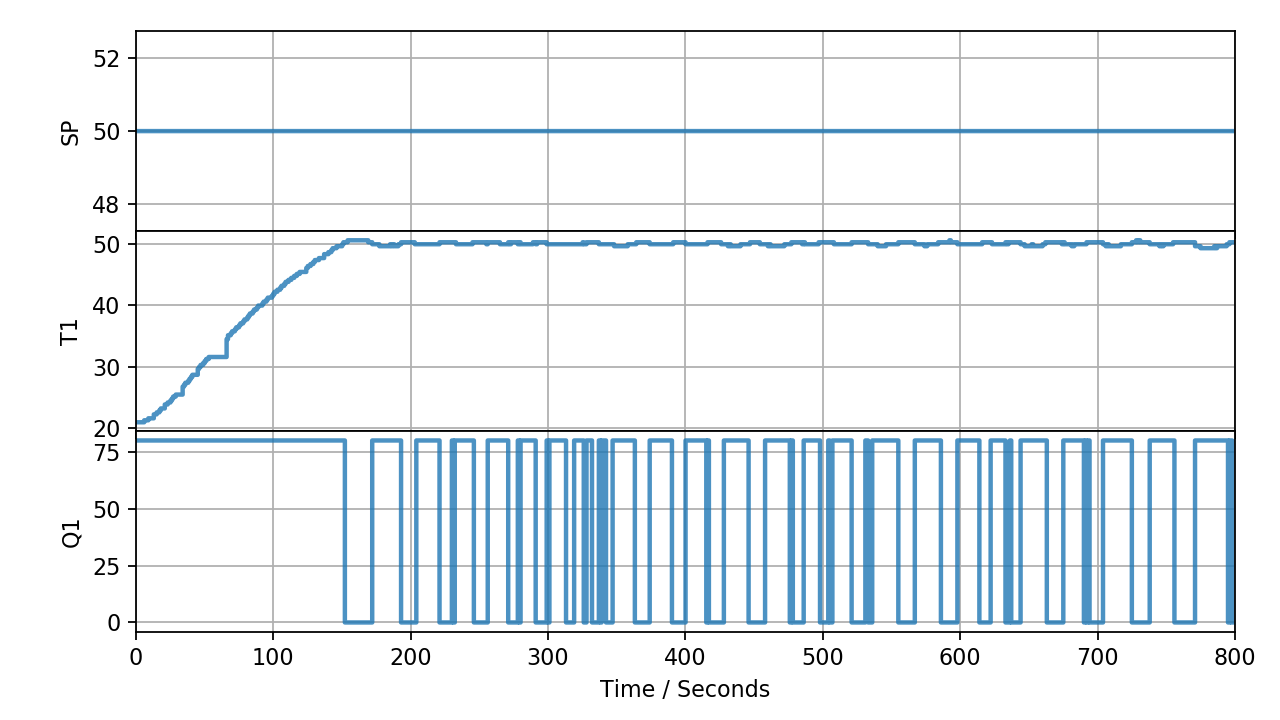

TCLab Model disconnected successfully.


In [0]:
%matplotlib notebook
from tclab import setup, clock, Historian, Plotter
TCLab = setup(connected=False, speedup=20)

tf = 800        # run time
Umax = 80
Umin = 0

with TCLab() as lab:
    
    sources = ('SP', lambda: Tsetpoint(t)), ('T1', lambda: lab.T1), ('Q1', lab.Q1)
    h = Historian(sources)
    p = Plotter(h, tf)
    
    for t in clock(tf):
        T1 = lab.T1                     # take measurement
        Tsp = Tsetpoint(t)              # get setpoint
        U1 = Umax if T1 < Tsp else Umin # compute control action
        lab.U1 = U1                     # set manipulated variable  
        p.update(t)                     # log data

## Let's Construct a More Challenging Control Objective

In [0]:
def Tsetpoint(t):
    if t <= 200:
        Tsp = 50
    elif t > 200 and t <= 300:
        Tsp = 50 - 0.10*(t-200)
    elif t > 300 and t <= 500:
        Tsp = 40
    elif t > 500 and t <= 700:
        Tsp = 40 + 0.05*(t-500)
    else:
        Tsp = 50
    return Tsp

TCLab version 0.4.8
Simulated TCLab


<IPython.core.display.Javascript object>


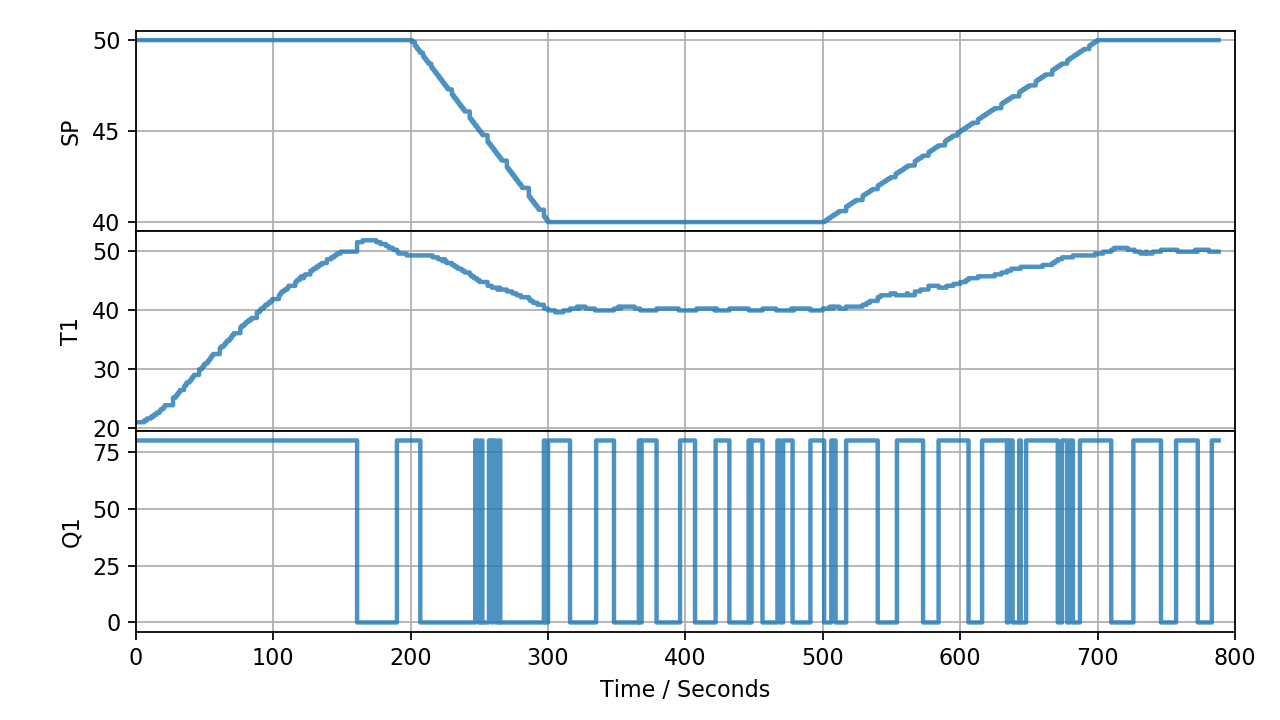

TCLab Model disconnected successfully.


In [0]:
%matplotlib notebook
from tclab import setup, clock, Historian, Plotter
TCLab = setup(connected=False, speedup=20)

tf = 800        # run time
Umax = 80
Umin = 0

with TCLab() as lab:
    
    sources = ('SP', lambda: Tsetpoint(t)), ('T1', lambda: lab.T1), ('Q1', lab.Q1)
    h = Historian(sources)
    p = Plotter(h, tf)
    
    for t in clock(tf):
        T1 = lab.T1                     # take measurement
        Tsp = Tsetpoint(t)              # get setpoint
        U1 = Umax if T1 < Tsp else Umin # compute control action
        lab.U1 = U1                     # set manipulated variable  
        p.update(t)                     # log data

In [0]:
def myfun(n):
    k = 0
    while True:
        yield k
        k = k + 1

    

0
1
2
3
4
5


In [0]:
fcn = myfun(5)
fcn.send(None)
next(fcn)
next(fcn)

2

## How can we incorporate complex control algorithms?

In [0]:
def thermostat(Qmin, Qmax):
    Q = 0
    while True:
        Tsp, T = yield Q
        Q = Qmax if T < Tsp else Qmin

TCLab version 0.4.8
Simulated TCLab


<IPython.core.display.Javascript object>


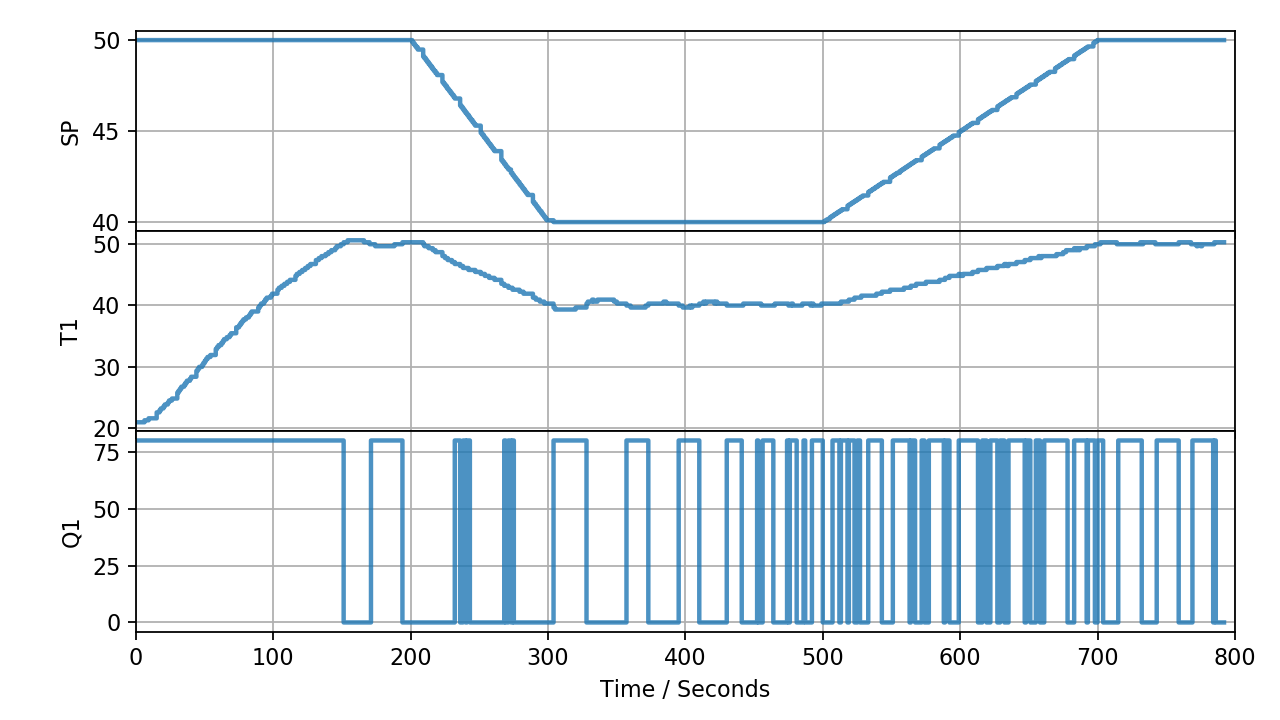

TCLab Model disconnected successfully.


In [0]:
%matplotlib notebook
from tclab import setup, clock, Historian, Plotter
TCLab = setup(connected=False, speedup=20)

tf = 800        # run time
Umax = 80
Umin = 0

controller = thermostat(0, 80)
controller.send(None)

with TCLab() as lab:
    h = Historian([('SP', lambda: Tsetpoint(t)),
                   ('T1', lambda: lab.T1),
                   ('Q1', lab.Q1)])
    p = Plotter(h, tf)
    for t in clock(tf):
        T1 = lab.T1                     # take measurement
        Tsp = Tsetpoint(t)              # get setpoint
        U1 = controller.send([Tsp, T1])   # compute control action
        lab.U1 = U1                     # set manipulated variable  
        p.update(t)                     # log data